<a id="goal"></a>
## Project Description and Goal

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.<br>
You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import warnings

In [2]:
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [3]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
data.tail(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Conclusion

<font color="blue">
    
The dataset has 13 columns and 51525 rows. <br>
There are missing values in columns: `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`.

<a id="preprocessing"></a>
## Step 2. Data preprocessing

###  Processing missing values

In [6]:
data['is_4wd']=data['is_4wd'].fillna(value=0)

In [7]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [8]:
data['paint_color'] = data.groupby('model')['paint_color'].apply(lambda x: x.fillna(x.mode()[0]))

In [9]:
data['paint_color'].mode()[0]

'white'

In [10]:
data.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [11]:
data['model_year']=data.groupby('model')['model_year']. apply(lambda x: x.fillna(x.mode([0])))

In [12]:
data['model_year'] = data.groupby('model')['model_year'].transform(lambda x: x.fillna(x.mode()[0]))

In [13]:
data['model_year'].isnull().sum()

0

In [14]:
data['cylinders'] = data.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mode()[0]))

In [15]:
data.isnull().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [17]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,51525.000000,43633.000000,51525.000000,51525.00000
mean,12132.464920,2009.871033,6.121494,115553.461738,0.496303,39.55476
std,10040.803015,6.145084,1.657296,65094.611341,0.499991,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2007.000000,4.000000,70000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


In [18]:
data['model_year'].value_counts()

2013.0    4087
2014.0    3868
2012.0    3813
2015.0    3761
2011.0    3604
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [19]:
data['odometer'] = data.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))

In [20]:
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        1
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [21]:
data['odometer']=data['odometer'].fillna(data['odometer'].median())

In [22]:
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### Data type replacement

In [23]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,160954.0,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [24]:
data['model_year']=data['model_year'].astype('int')

In [25]:
data['cylinders']=data['cylinders'].astype('int')

In [26]:
data['odometer']=data['odometer'].astype('int')

In [27]:
data['date']=pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  object        
 12  days_listed   51525 non-null  int64         
 13  date          51525 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(7)
memory usage: 4.9+ MB


### Processing duplicates

In [29]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,black,1.0,2018-06-23,19,2018-06-23
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2018-10-19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019-02-07
3,1500,2003,ford f-150,fair,8,gas,160954,automatic,pickup,white,0.0,2019-03-22,9,2019-03-22
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019-04-02


In [30]:
data.duplicated().sum()

0

## Conclusion

<font color="blue">
    
**Missing values:**

Missing values may be due to forgetting or unwillingness to give information. for model_year maybe there was a droplist for each model and the year was not faound. For mileage perhaps the odometer was broken. 
    
Because color, model_year and cylinders are categorical variables, we use mode to fill in the missing values in these columns. That means, we use the most repetition in their columns, based on grouping by another column that does not have a missing value. In this case, the model column.    

For quantitive values, we fill the missing values with mean or median. We fill the missing values in odometer column with the medain based on grouping by model column. We use median because mean>medin and the mean is affected by outliers.  
    
    
1- The data in the column`is_4wd` are of Boolean type. the missing values are logically zero, the data was not entered because it was False. So we fill them with zero.

2- The `color` column: we fill the missing data with the colors which are the maximum number of car colors(mode of car colors) for each model(grouped by model). it means the maximum repetition for each color based on the model
    
3- The `model_year` column: we fill the missing data with the data which have the maximum number of model_year(mode of model_year) grouped by each model.      
    
4- Also in the `cylinders` column: we fill the missing values with the data which have the maximum number of cylinders(mode of cylinders) grouped by each model.  
    
5- The `odometer` column: first we fill the missing data with the median of the mileage grouped by model_year. There is one group by model_year which has no adometer values; so it doesn't have a median.
We fill the rest with the general median. 
 

**Data types:**
   
We change the type of columns: `model_year`, `cylinders` into integer, because they are logically integers and can't be float. In column `odometer` values are entered without decimals and we have zero after decimals, so we conver them to integer.
    
**Duplicated:**    
    
The table was checked one more time, there is neither missing values nor duplicates.    

## Step 3. Make calculations and add them to the table

In [31]:
data['dayofweek']=pd.DatetimeIndex(data['date_posted']).dayofweek
data['dayofweek']

0        5
1        4
2        3
3        4
4        1
        ..
51520    2
51521    2
51522    3
51523    0
51524    1
Name: dayofweek, Length: 51525, dtype: int64

In [32]:
data['month']=pd.DatetimeIndex(data['date_posted']).month
data['month']

0         6
1        10
2         2
3         3
4         4
         ..
51520    10
51521    11
51522    11
51523     7
51524     6
Name: month, Length: 51525, dtype: int64

In [33]:
data['year']=pd.DatetimeIndex(data['date_posted']).year
data['year']

0        2018
1        2018
2        2019
3        2019
4        2019
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: year, Length: 51525, dtype: int64

In [34]:
data['age']=data['year']-data['model_year']
data['age']

0         7
1         5
2         6
3        16
4         2
         ..
51520     5
51521    16
51522     9
51523     5
51524     4
Name: age, Length: 51525, dtype: int64

In [35]:
def mileage_per_year(row):
    age=row['age']
    mileage=row['odometer']
    if age==0:
        return mileage
    else:    
        return mileage/age

In [36]:
data['mileage_per_year']=data.apply(mileage_per_year, axis=1)

In [37]:
data['mileage_per_year']

0        20714.285714
1        17741.000000
2        18333.333333
3        10059.625000
4        40451.500000
             ...     
51520    17627.200000
51521    11343.750000
51522    14222.222222
51523    27914.600000
51524    22747.500000
Name: mileage_per_year, Length: 51525, dtype: float64

In [38]:
data['age'].isnull().sum()

0

In [39]:
data['mileage_per_year']=data['mileage_per_year'].astype('int')

In [40]:
def condition_level(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':    
        return 3
    if condition == 'good': 
        return 2
    if condition == 'fair':
        return 1
    return 0

In [41]:
data['condition']=data['condition'].apply(condition_level)
data['condition']

0        2
1        2
2        4
3        1
4        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: condition, Length: 51525, dtype: int64

In [42]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date,dayofweek,month,year,age,mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,1.0,2018-06-23,19,2018-06-23,5,6,2018,7,20714
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2018-10-19,4,10,2018,5,17741
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019-02-07,3,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,0.0,2019-03-22,9,2019-03-22,4,3,2019,16,10059
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019-04-02,1,4,2019,2,40451


## Conclusion

<font color="blue">
We calculate and add to the table the following to continue the analysis with their help:
    
 - Day of the week, month, and year the ad was place   
 - The vehicle's age (in years) when the ad was placed
 - The vehicle's average mileage per year
 
In the condition column, we replace string values with a numeric scale:
 - new = 5
 - like new = 4
 - excellent = 3
 - good = 2
 - fair = 1
 - salvage = 0

<a id="eda"></a>
## Step 4. Exploratory data analysis

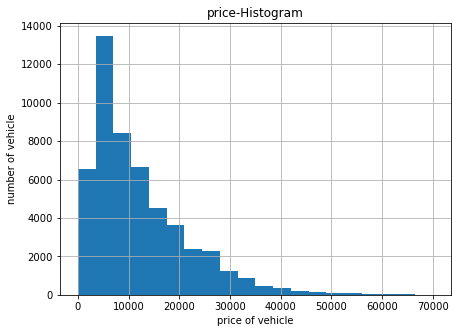

In [43]:
data.hist('price',bins=20 ,range=(0,70000), figsize=(7,5))
plt.title('price-Histogram')
plt.xlabel('price of vehicle')
plt.ylabel('number of vehicle')
plt.show()

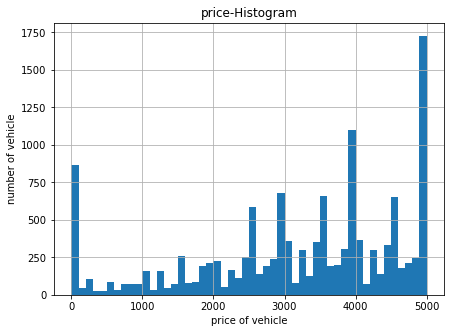

In [44]:
data.hist('price',bins=50, range=(0,5000), figsize=(7,5))
plt.title('price-Histogram')
plt.xlabel('price of vehicle')
plt.ylabel('number of vehicle')
plt.show()

In [45]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

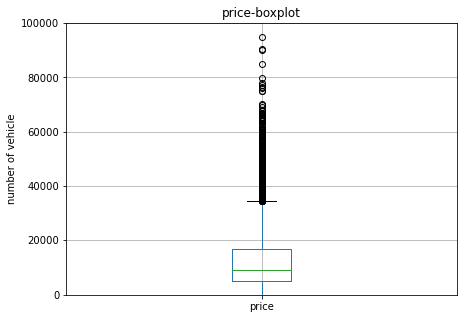

In [46]:
data.boxplot('price', figsize=(7,5))
plt.ylim(-100,100000)
plt.ylabel('number of vehicle')
plt.title('price-boxplot')
plt.show()

In [47]:
len(data.query('price<100'))/len(data)*100

1.6749150897622511

In [48]:
len(data.query('price>50000'))/len(data)*100

0.44056283357593407

<font color="blue"> **price**
    
In the histogram of price, we see that the peak of price is between 5000 and 7000. It is not far from the mind, because it is the average price of a car that is mostly bought and sold. Prices more than 60,000 are outlier and the number of them is close to zero. They are too expensive!

The mean for price is 12132 and the median is 9000. The higher average indicates high outliers.

A peak is also observed around 0. By decreasing the range, we see that about 850 cars have prices below 100. That is irrational! This is about 1.6% of the total data and we can ignore it.

So for the price we can ignore the data over 50,000 and less than 100.

In [49]:
data['age'].describe()

count    51525.000000
mean         8.436429
std          6.158509
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

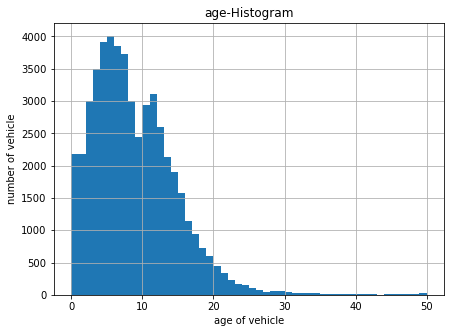

In [50]:
data.hist('age', bins=50, range=(0,50),figsize=(7,5))
plt.title('age-Histogram')
plt.xlabel('age of vehicle')
plt.ylabel('number of vehicle')
plt.show()

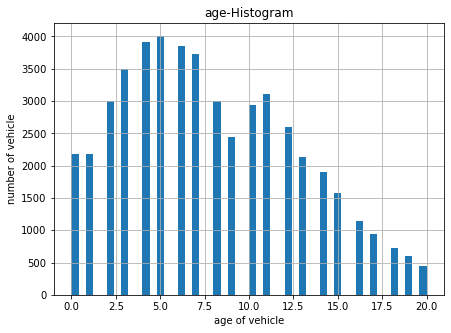

In [51]:
data.hist('age',bins=50, range=(0,20),figsize=(7,5))
plt.title('age-Histogram')
plt.xlabel('age of vehicle')
plt.ylabel('number of vehicle')
plt.show()

In [52]:
len(data.query('age>30'))/len(data)*100

0.6754002911208151

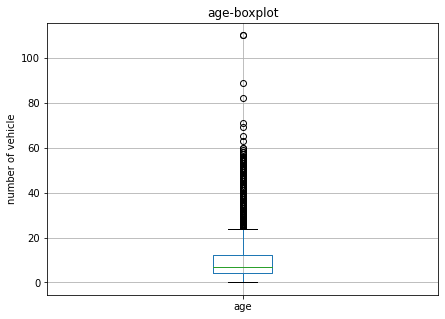

In [53]:
data.boxplot('age',figsize=(7,5))
plt.ylabel('number of vehicle')
plt.title('age-boxplot')
plt.show()

<font color="blue"> **age of car**
    
In the histogram of age of car (when the ad was placed), we see a peak between 4 and 7 year. It is normal for most people to sell their car after four to seven years. 
    
The number of cars over 40 years old is very small. They are too old and outliers.
    
The mean for age is 8.43 and the median is 7. The higher average indicates high outliers.
A peak is also observed around 0. There are about 2200 new cars.
    
We can ignore the cars older than 30 years in our analysis, which are just 0.67% of the data.


In [54]:
data['odometer'].describe()

count     51525.000000
mean     115129.360505
std       62083.643882
min           0.000000
25%       73289.000000
50%      113683.000000
75%      152732.000000
max      990000.000000
Name: odometer, dtype: float64

In [55]:
data.query('condition<=2 and odometer<50')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date,dayofweek,month,year,age,mileage_per_year
814,2995,1999,ford f-150,2,6,gas,0,manual,truck,white,0.0,2019-03-14,16,2019-03-14,3,3,2019,20,0
1375,5888,2008,toyota 4runner,2,6,gas,0,automatic,SUV,black,0.0,2019-02-22,36,2019-02-22,4,2,2019,11,0
1461,1000,1992,gmc sierra 1500,2,8,gas,0,automatic,truck,white,0.0,2018-09-28,47,2018-09-28,4,9,2018,26,0
1970,10988,2000,ford f-250 sd,2,8,diesel,0,automatic,truck,white,1.0,2018-11-21,39,2018-11-21,2,11,2018,18,0
2077,11888,2010,chevrolet silverado 1500,2,8,gas,0,automatic,truck,white,0.0,2018-07-02,24,2018-07-02,0,7,2018,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002,hyundai santa fe,2,6,gas,0,automatic,wagon,white,1.0,2019-04-14,31,2019-04-14,6,4,2019,17,0
49284,3300,2002,hyundai santa fe,2,6,gas,0,automatic,wagon,white,1.0,2019-02-15,7,2019-02-15,4,2,2019,17,0
50412,25500,2012,jeep wrangler,2,6,gas,0,automatic,SUV,yellow,1.0,2018-06-12,48,2018-06-12,1,6,2018,6,0
50631,3600,2012,chrysler 200,2,4,gas,0,automatic,sedan,red,0.0,2018-07-24,90,2018-07-24,1,7,2018,6,0


In [56]:
data.query('condition==5 and odometer>100')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date,dayofweek,month,year,age,mileage_per_year
470,34000,2016,chevrolet camaro,5,8,gas,3396,automatic,coupe,red,0.0,2018-12-17,14,2018-12-17,0,12,2018,2,1698
663,30000,2018,toyota highlander,5,6,gas,6893,automatic,SUV,white,0.0,2018-07-14,24,2018-07-14,5,7,2018,0,6893
833,44505,2019,dodge charger,5,8,gas,202,automatic,sedan,black,0.0,2019-02-06,44,2019-02-06,2,2,2019,0,202
901,23000,2018,honda civic,5,4,gas,13800,automatic,hatchback,grey,0.0,2018-08-18,25,2018-08-18,5,8,2018,0,13800
1974,7000,2009,chevrolet silverado 1500,5,8,gas,194700,automatic,truck,white,1.0,2018-11-04,17,2018-11-04,6,11,2018,9,21633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49458,6800,2016,hyundai elantra,5,4,gas,69000,automatic,sedan,black,0.0,2018-12-12,18,2018-12-12,2,12,2018,2,34500
49816,8200,2008,toyota tacoma,5,6,gas,234000,automatic,truck,silver,1.0,2018-09-20,27,2018-09-20,3,9,2018,10,23400
50077,19000,2018,honda civic,5,4,gas,12632,automatic,sedan,grey,0.0,2018-10-04,15,2018-10-04,3,10,2018,0,12632
50113,66000,2018,ford f-250,5,8,diesel,22000,automatic,truck,white,1.0,2018-07-19,4,2018-07-19,3,7,2018,0,22000


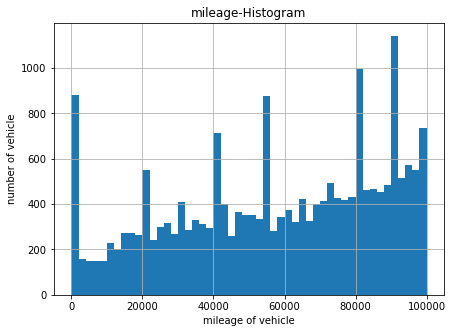

In [57]:
data.hist('odometer',bins=50, range=(0,100000),figsize=(7,5))
plt.title('mileage-Histogram')
plt.xlabel('mileage of vehicle')
plt.ylabel('number of vehicle')
plt.show()

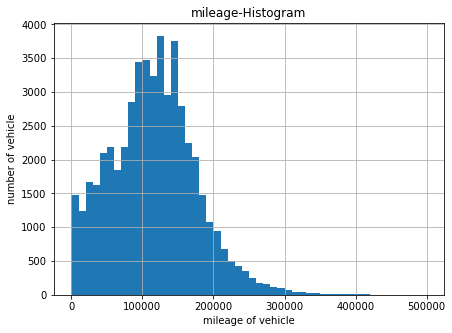

In [58]:
data.hist('odometer',bins=50, range=(0,500000),figsize=(7,5))
plt.title('mileage-Histogram')
plt.xlabel('mileage of vehicle')
plt.ylabel('number of vehicle')
plt.show()

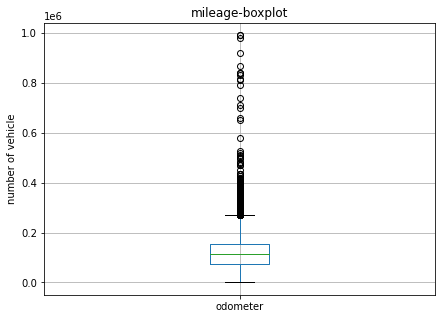

In [59]:
data.boxplot('odometer',figsize=(7,5))
plt.ylabel('number of vehicle')
plt.title('mileage-boxplot')
plt.show()

In [60]:
len(data.query('odometer>300000'))/len(data)*100

0.557011159631247

<font color="blue"> **mileage**
    
In the histogram for mileage of cars, we see a peak between 100000 and 150000 kilometer.  The number of cars their mileage is more than 300000 kilometers is very low. They are outliers.

The mean for mileage is 115129 and the median is 113683. The mean and median are close, but still is the mean more and a sign of high outliers.
    
A peak is also observed around 0. By decreasing the range, we can see there are about 900 cars with less than 1000 mileage.
    
We can ignore the cars whose mileage are more than 300000 years in our analysis, which are just 0.55% of the data.


In [61]:
data['cylinders'].describe()

count    51525.000000
mean         6.121494
std          1.657296
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

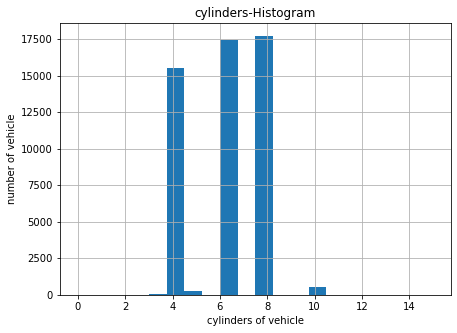

In [62]:
data.hist('cylinders',bins=20, range=(0,15),figsize=(7,5))
plt.title('cylinders-Histogram')
plt.xlabel('cylinders of vehicle')
plt.ylabel('number of vehicle')
plt.show()

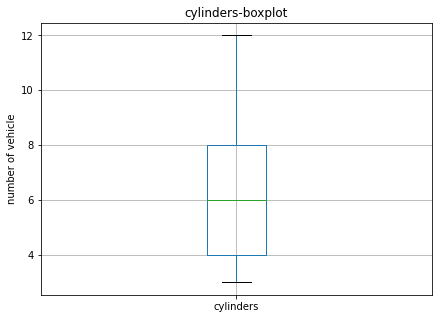

In [63]:
data.boxplot('cylinders',figsize=(7,5))
plt.title('cylinders-boxplot')
plt.ylabel('number of vehicle')
plt.show()

<font color="blue"> **cylinders**
    
In the histogram for cylinders, we see most cars have 8 and 6 cylinders. A small number of cars have 3, 5 and 12 cylinders
The mean is 6.12 and the median 6. They are almost the same. 


In [64]:
data['condition'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

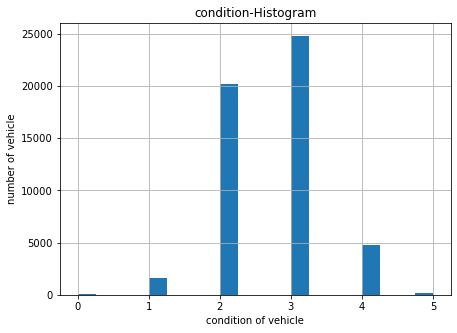

In [65]:
data.hist('condition',bins=20, range=(0,5),figsize=(7,5))
plt.title('condition-Histogram')
plt.xlabel('condition of vehicle')
plt.ylabel('number of vehicle')
plt.show()

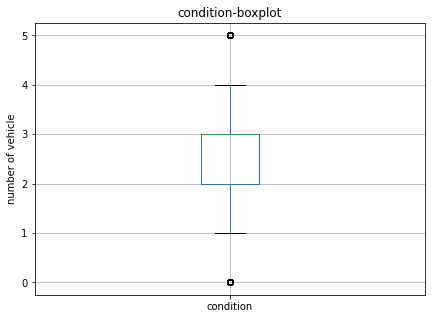

In [66]:
data.boxplot('condition',figsize=(7,5))
plt.title('condition-boxplot')
plt.ylabel('number of vehicle')
plt.show()

<font color="blue"> **condition**
    
In the histogram for condition, we see most cars are in excellent or good condition. A small number of them are new and a small number are salvage.
    
The mean is 2.63 and the median 3. They are almost the same.



In [67]:
good_data=data.query('100<price<50000 and age<30 and odometer<300000 and ~(condition<=3 and odometer<50) and ~(condition==5 and odometer>100)') 

In [68]:
len(good_data)

49458

In [69]:
len(good_data)/len(data)*100

95.98835516739447

In [70]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49458 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             49458 non-null  int64         
 1   model_year        49458 non-null  int32         
 2   model             49458 non-null  object        
 3   condition         49458 non-null  int64         
 4   cylinders         49458 non-null  int32         
 5   fuel              49458 non-null  object        
 6   odometer          49458 non-null  int32         
 7   transmission      49458 non-null  object        
 8   type              49458 non-null  object        
 9   paint_color       49458 non-null  object        
 10  is_4wd            49458 non-null  float64       
 11  date_posted       49458 non-null  object        
 12  days_listed       49458 non-null  int64         
 13  date              49458 non-null  datetime64[ns]
 14  dayofweek         4945

<font color="blue"> **filtering data**

We filter the data under these conditions and then re-examine the graphs:

- 100<price<50000 
- age<30 
- Mileage <300000 and  
- not  (condition<=3 and mileage<50)
- not (condition==5 and mileage>100)
    
the filtered data is 95% of it, we just removed 5%.


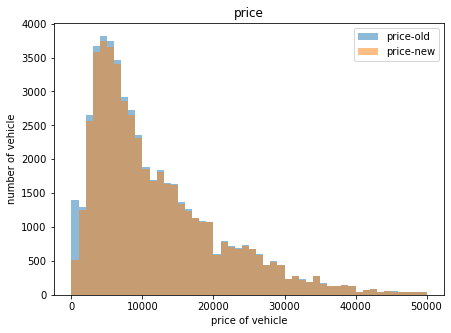

In [71]:
plt.figure(figsize=(7,5))
plt.hist(data.price, bins=50, range=(0,50000), alpha=0.5, label='price-old')
plt.hist(good_data.price, bins=50, range=(0,50000), alpha=0.5, label='price-new')
plt.title('price')
plt.xlabel('price of vehicle')
plt.ylabel('number of vehicle')
plt.legend()
plt.show()

In [72]:
good_data['price'].describe()

count    49458.000000
mean     12130.745319
std       8979.716620
min        105.000000
25%       5350.000000
50%       9495.000000
75%      16900.000000
max      49998.000000
Name: price, dtype: float64

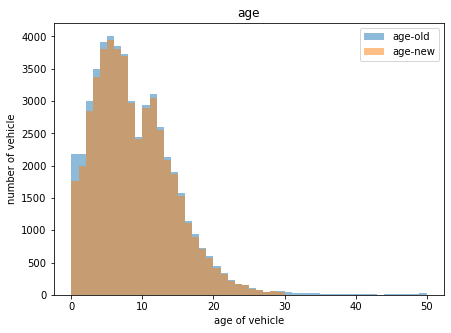

In [73]:
plt.figure(figsize=(7,5))
plt.hist(data.age, bins=50, range=(0,50), alpha=0.5, label='age-old')
plt.hist(good_data.age, bins=50, range=(0,50), alpha=0.5, label='age-new')
plt.title('age')
plt.xlabel('age of vehicle')
plt.ylabel('number of vehicle')
plt.legend()
plt.show()

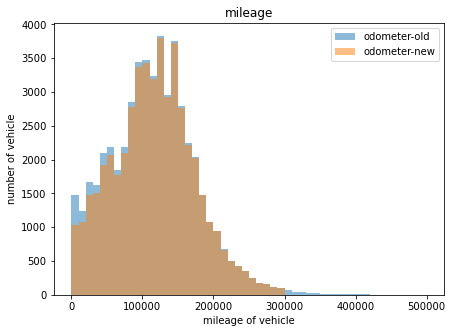

In [74]:
plt.figure(figsize=(7,5))
plt.hist(data.odometer, bins=50, range=(0,500000), alpha=0.5, label='odometer-old')
plt.hist(good_data.odometer, bins=50, range=(0,500000), alpha=0.5, label='odometer-new')
plt.title('mileage')
plt.xlabel('mileage of vehicle')
plt.ylabel('number of vehicle')
plt.legend()
plt.show()

<font color="blue"> **Histograms for filtered data**

1- In the new price Histogram we removed the too high and too low (less than 100) prices. The two graphs are similar with the same peak and the same mean and median.
    
2- In the new age Histogram, cars over 30 years old were eliminated, the peak is still between 4 and 7 years old. And has similar mean and median.
    
3- In the new mileage diagram, data by the conditions:
    
- condition <= 3 and mileage <50
- condition == 5 and mileage> 100
    
were deleted. The two graphs are similar. With the same peak and mean and median.

So, the new data is appropriate for analysing and we continue with new data.


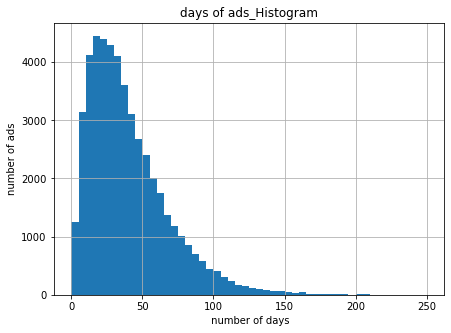

In [75]:
good_data.hist('days_listed',bins=50, range=(0,250),figsize=(7,5))
plt.title('days of ads_Histogram')
plt.xlabel(' number of days')
plt.ylabel('number of ads')
plt.show()

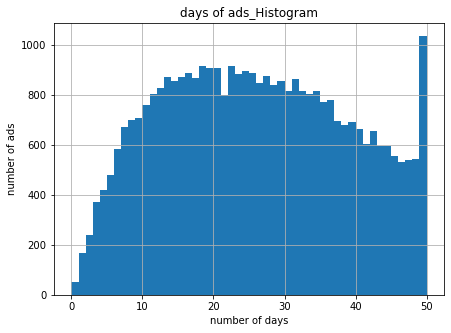

In [76]:
good_data.hist('days_listed',bins=50, range=(0,50),figsize=(7,5))
plt.title('days of ads_Histogram')
plt.xlabel('number of days')
plt.ylabel('number of ads')
plt.show()

In [77]:
good_data['days_listed'].describe()

count    49458.000000
mean        39.564580
std         28.223165
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<font color="blue"> **Lifetime of ads**
    
In total, we had about 50,000 ads. The maximum number of ad-days is 271 days and the minimum is 0 days.
    
The average lifetime of ads is 40 days. About half of the ads stay up to 33 days. 
    
The lifetime of 15-25 days has the most repetition. A small number of ads(about 50) were removed on the first day.The cars may have sold out quickly or the dealers may have regretted it.
    
A small number of ads have remained for more than 100 days. Probably high-priced or unfavorable cars fall into this category.

In [78]:
stat=good_data.pivot_table(index='type', values='price' , aggfunc=['mean','count']).\
reset_index()
stat

,type,mean,count
,,price,price
0,SUV,11287.524091,11996
1,bus,17135.666667,24
2,convertible,13120.941333,375
3,coupe,14543.330868,2028
4,hatchback,6859.460317,1008
5,mini-van,8013.871192,1149
6,offroad,14435.391304,207
7,other,10885.396694,242
8,pickup,15909.021233,6782


In [79]:
stat.columns=['type','average_price','ad_number']
stat=stat.sort_values('ad_number', ascending=False)
stat

,type,average_price,ad_number
0,SUV,11287.524091,11996
9,sedan,7037.903264,11826
10,truck,16792.181935,11702
8,pickup,15909.021233,6782
3,coupe,14543.330868,2028
12,wagon,9124.583609,1513
5,mini-van,8013.871192,1149
4,hatchback,6859.460317,1008
11,van,10815.641914,606
2,convertible,13120.941333,375


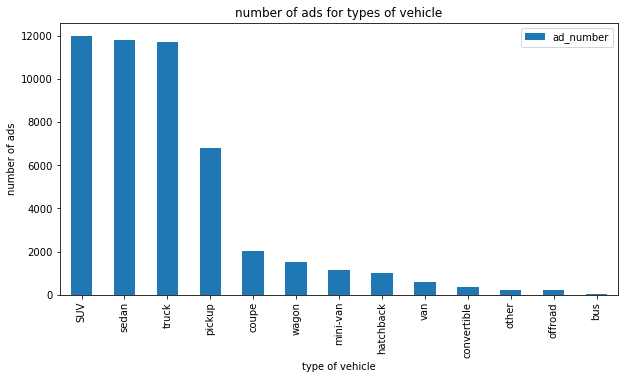

In [80]:
stat.plot.bar(x='type', y='ad_number',figsize=(10,5))
plt.title('number of ads for types of vehicle')
plt.xlabel('type of vehicle')
plt.ylabel('number of ads')
plt.show()

<font color="blue"> 

We plot a graph showing the number of ads for each type of car. As we see, the largest number of ads is related to the type SUV(with average price of 11286), seden(with average price of 7037),  and truck(with average price of 16792). They have a significant distance from the other types of car.
    
Type bus(with average price of 17135), has the least number of ads.
    
We select the two types with the greatest number of ads: Suv and sedan.   

In [81]:
sample1=good_data.query('type=="SUV"')
len(sample1)

11996

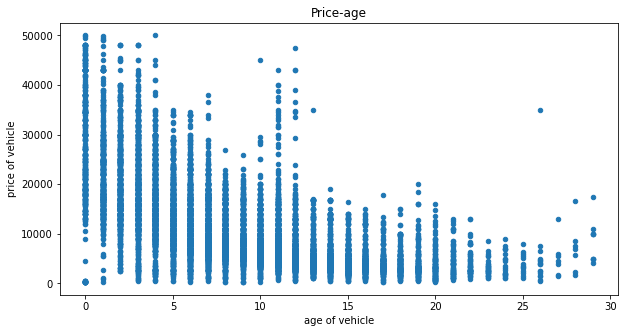

In [82]:
sample1.plot.scatter(x='age', y='price',figsize=(10,5))
plt.title('Price-age')
plt.xlabel('age of vehicle')
plt.ylabel('price of vehicle')
plt.show()

In [83]:
sample1['price'].corr(sample1['age'])

-0.6230147587881301

<font color="blue"> **price - age**
    
We see that the chart has a downward trend. The older the car, the smaller the price. The correlation coefficient is about -0.62. The price and age of the car are inversely related.


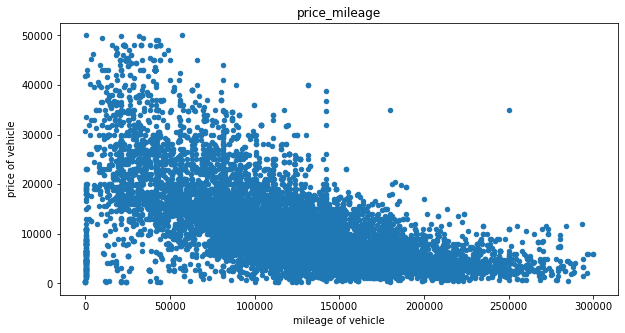

In [84]:
sample1.plot.scatter(x='odometer', y='price',figsize=(10,5))
plt.title('price_mileage')
plt.xlabel('mileage of vehicle')
plt.ylabel('price of vehicle')
plt.show()

In [85]:
sample1['price'].corr(sample1['odometer'])

-0.6172548680441763

<font color="blue"> **price - mileage**

We see that the chart also has a downward trend. The longer the car travels and the more it works, the lower the price. The correlation coefficient is about -0.61. The price and mileage of the car  inversely related.

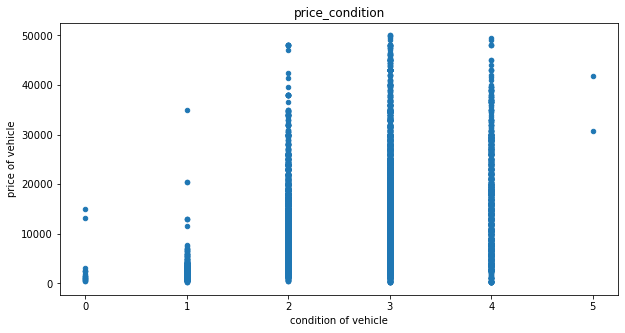

In [86]:
sample1.plot.scatter(x='condition', y='price',figsize=(10,5))
plt.title('price_condition')
plt.xlabel('condition of vehicle')
plt.ylabel('price of vehicle')
plt.show()

In [87]:
sample1['price'].corr(sample1['condition'])

0.29570697246387534

In [88]:
sample1['condition'].value_counts()

3    6272
2    4259
4    1134
1     309
0      20
5       2
Name: condition, dtype: int64

<font color="blue"> **price - condition**
    
In the chart, we see that the cars of type SUV, are mostly in condition 3, 4 and 2. There are not many cars in condition 5 and therefore it cannot be included in the analysis. Cars with prices above 40,000 are also in conditions, better than 1 and 2. The better the condition of the car, the higher the price can be, and the worse the condition, the lower the price, which is normal. The correlation coefficient is 0.29. Which is a sign of direct solidarity but not so much.
    

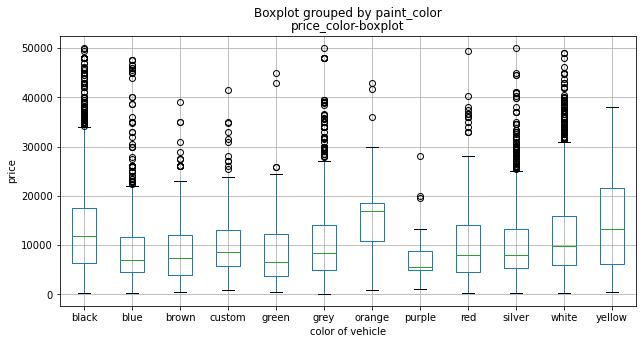

In [89]:
sample1.boxplot('price', 'paint_color',figsize=(10,5))
plt.title('price_color-boxplot')
plt.xlabel('color of vehicle')
plt.ylabel('price')
plt.show()

In [90]:
sample1['paint_color'].value_counts()

black     3216
white     2153
silver    2020
grey      1331
blue      1119
red        884
green      466
brown      361
custom     277
orange      84
yellow      46
purple      39
Name: paint_color, dtype: int64

In [91]:
sample1_color=sample1.query('paint_color!="yellow" and paint_color!="purple"')

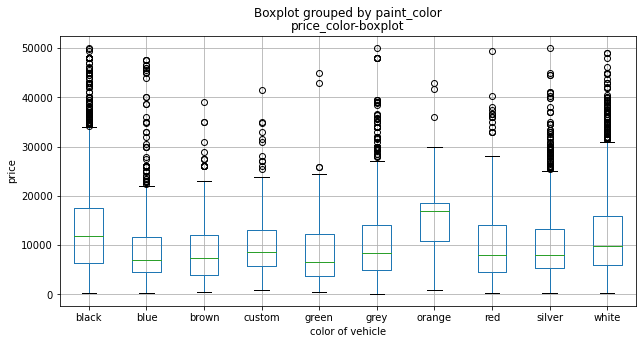

In [92]:
sample1_color.boxplot('price', 'paint_color',figsize=(10,5))
plt.title('price_color-boxplot')
plt.ylabel('price')
plt.xlabel('color of vehicle')
plt.show()

<font color="blue"> **price - color**
    
To analyze the price and color, we check the number of ads for different colors. We see that for yellow and purple colors, the number is less than 50, so we do the analysis without considering them.
    
We see that the median of price for different colors in descending order, is as follows:
    
Orange, black, white, custom and gray, silver, brown, red, blue and green.
    
The color of the car affects its price. In SUV type of cars orange, black and white colors have higher medians of price and blue and green have lower medians.    


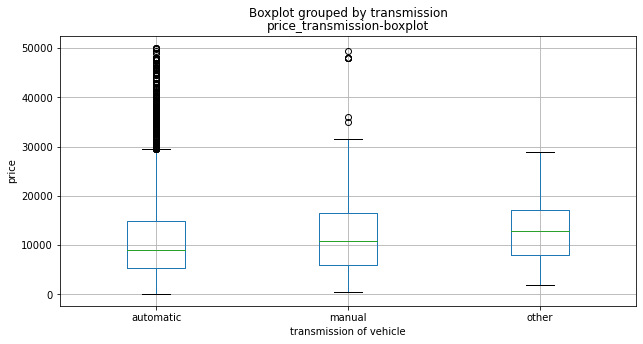

In [93]:
sample1.boxplot('price', 'transmission',figsize=(10,5))
plt.title('price_transmission-boxplot')
plt.ylabel('price')
plt.xlabel('transmission of vehicle')
plt.show()

In [94]:
sample1['transmission'].value_counts()

automatic    11413
manual         491
other           92
Name: transmission, dtype: int64

<font color="blue"> **price - transmission type**
    
We see that the median of price for transmission type as descending, is as follows:
Other, manual and automatic.

Naturally, automatic transmissions are more expensive than manual transmissions. But in the type of the SUV, we see the opposite. Of course, our groups have different numbers, and the amount of data in other and manually category, is much less than automatic, and this makes the conclusion uncertain.


In [95]:
sample2=good_data.query('type=="sedan"')
len(sample2)

11826

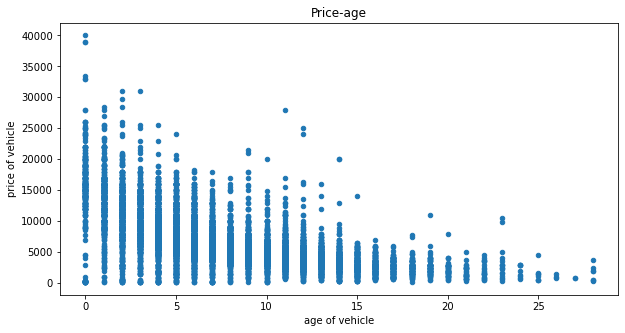

In [96]:
sample2.plot.scatter(x='age', y='price',figsize=(10,5))
plt.title('Price-age')
plt.xlabel('age of vehicle')
plt.ylabel('price of vehicle')
plt.show()

In [97]:
sample2['price'].corr(sample2['age'])

-0.6526206015772198

<font color="blue"> **price - age**

We see that the chart has a downward trend. The older the car, the smaller the price. The correlation coefficient is about -0.65. The price and age of the car are inversely related.

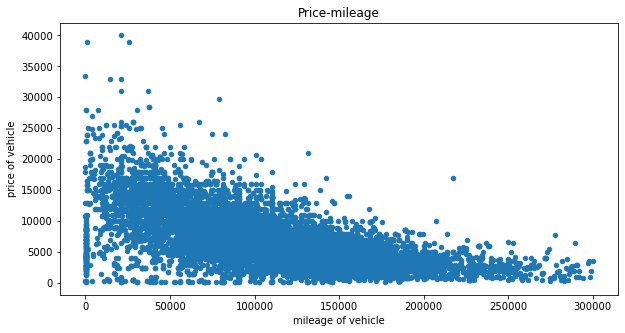

In [98]:
sample2.plot.scatter(x='odometer', y='price',figsize=(10,5))
plt.title('Price-mileage')
plt.xlabel('mileage of vehicle')
plt.ylabel('price of vehicle')
plt.show()

In [99]:
sample2['price'].corr(sample2['odometer'])

-0.6179325956500525

<font color="blue"> **price - mileage**

We see that the chart also has a downward trend. The longer the car travels and the more it works, the lower the price. The correlation coefficient is about -0.61. The price and mileage of the car  inversely related.

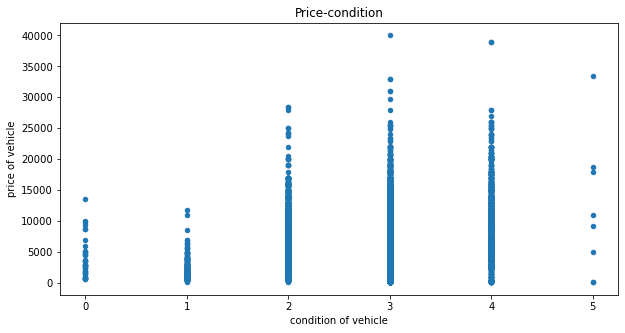

In [100]:
sample2.plot.scatter(x='condition', y='price',figsize=(10,5))
plt.title('Price-condition')
plt.xlabel('condition of vehicle')
plt.ylabel('price of vehicle')
plt.show()

In [101]:
sample2['condition'].value_counts()

3    5931
2    4248
4    1310
1     289
0      40
5       8
Name: condition, dtype: int64

In [102]:
sample2['price'].corr(sample2['condition'])

0.3126420082392273

<font color="blue"> **price - condition**
    
In the chart, we see that the cars of type SUV, are mostly in condition 3, 4 and 2. There are not many cars in condition 5 and therefore it cannot be included in the analysis. Cars with prices above 15,000 are also in conditions, better than 1 and 2. The better the condition of the car, the higher the price can be, and the worse the condition, the lower the price, which is normal. The correlation coefficient is 0.31. Which is a sign of direct solidarity but not so much.

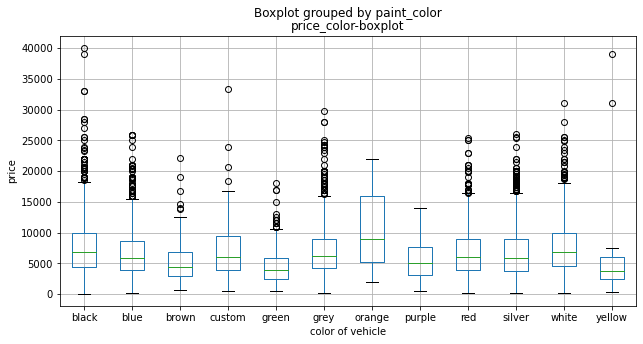

In [103]:
sample2.boxplot('price', 'paint_color',figsize=(10,5))
plt.title('price_color-boxplot')
plt.ylabel('price')
plt.xlabel('color of vehicle')
plt.show()

In [104]:
sample2['paint_color'].value_counts()

silver    2942
black     2381
grey      2076
white     1458
blue      1272
red        908
custom     261
brown      257
green      213
purple      26
yellow      23
orange       9
Name: paint_color, dtype: int64

In [105]:
sample2_color=sample2.query('paint_color!="yellow" and paint_color!="purple" and paint_color!="orange"')

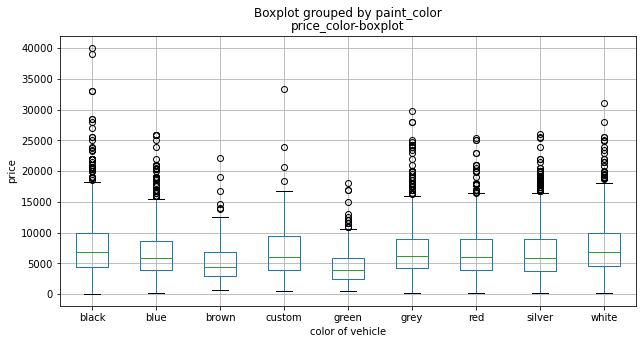

In [106]:
sample2_color.boxplot('price', 'paint_color',figsize=(10,5))
plt.title('price_color-boxplot')
plt.ylabel('price')
plt.xlabel('color of vehicle')
plt.show()

<font color="blue"> **price - color**
    
To analyze the price and color, we examine the number of ads for different colors. We see that for yellow, purple and orange, this number is less than 50, so we do the analysis without considering them.
    
We see that the median price for different colors in descending order is as follows:
    
Black and white, custom, gray, silver, red, blue, brown and green.
In sedan type of cars, black and white colors have higher prices, brown and green have lower prices.


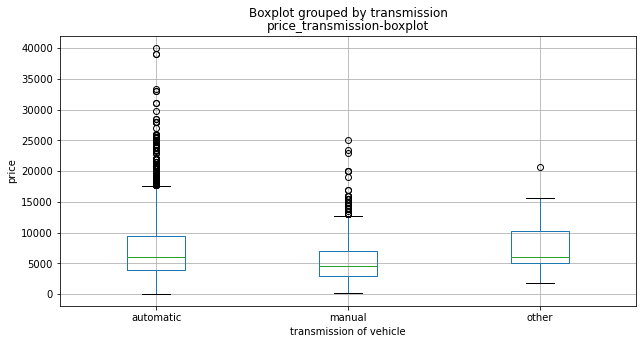

In [107]:
sample2.boxplot('price', 'transmission',figsize=(10,5))
plt.title('price_transmission-boxplot')
plt.ylabel('price')
plt.xlabel('transmission of vehicle')
plt.show()

In [108]:
sample2['transmission'].value_counts()

automatic    11175
manual         582
other           69
Name: transmission, dtype: int64

<font color="blue"> **price - transmission type**

We see that the median of price for transmission type as descending, is as follows:
automatic, other and manual
    
Naturally, automatic transmissions are more expensive than manual transmissions. We can see this fact in the chart. Although Our groups have different numbers, and the amount of data in other and manually category, is much less than automatic, and this makes the conclusion uncertain. 
    


## Step 5. Overall conclusion

<font color="blue"> 

### [Goal](#goal)    
The goal was to analyze the data abaout advertisements for cars. <br>
We should find out which factors influence the price of a car.
   
### [Data preprocessing](#preprocessing)
    
In order to work with appropriate and valid data, the following tasks were performed:

 - Processing missing values
 - Type replacement
 - Processing duplicates
       

### [Exploratory data analysis](#eda)
The following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition were studied. Histograms for each of them were shown.  

**price**
In the histogram of price, we see that the peak of price is between 5000 and 7000. It is not far from the mind, because it is the average price of a car that is mostly bought and sold. Prices more than 60,000 are outlier and the number of them is close to zero. They are too expensive!
The mean for price is 12132 and the median is 9000. The higher average indicates high outliers.
A peak is also observed around 0. By decreasing the range, we see that about 850 cars have prices below 100. That is irrational! This is about 1.6% of the total data and we can ignore it.
So for the price we can ignore the data over 50,000 and less than 100.


**age of car**
In the histogram of age of car (when the ad was placed), we see a peak between 4 and 7 year. It is normal for most people to sell their car after four to seven years.
The number of cars over 40 years old is very small. They are too old and outliers.
The mean for age is 8.43 and the median is 7. The higher average indicates high outliers. A peak is also observed around 0. There are about 2200 new cars.
We can ignore the cars older than 30 years in our analysis, which are just 0.67% of the data.

**mileage**
In the histogram for mileage of cars, we see a peak between 100 and 150 kilometer. The number of cars their mileage is more than 300000 kilometers is very low. They are outliers.
The mean for mileage is 115129 and the median is 113683. The mean and median are close, but still is the mean more and a sign of high outliers.
A peak is also observed around 0. By decreasing the range, we can see there are about 900 cars with less than 1000 mileage.
We can ignore the cars whose mileage are more than 300000 years in our analysis, which are just 0.55% of the data.

**cylinders**
In the histogram for cylinders, we see most cars have 8 and 6 cylinders. A small number of cars have 3, 5 and 12 cylinders The mean is 6.12 and the median 6. They are almost the same. The distribution is almost normal.

**condition**
In the histogram for condition, we see most cars are in excellent or good condition. A small number of them are new and a small number are salvage.
The mean is 2.63 and the median 3. They are almost the same. The distribution is normal.

    
The data was filtered under these conditions and then the graphs were re-examined:
    
   - 100<price<50000
   - age<30
   - Mileage <300000 and
   - not (condition<=3 and mileage<50)
   - not (condition==5 and mileage>100)
    
the filtered data is 95% of it, we just removed 5%.

    
### Lifetime of advertisements
  
In total, we had about 50,000 ads. The maximum number of ad-days is 271 days and the minimum is 0 days.
The average lifetime of ads is 40 days. About half of the ads stay up to 33 days.
The lifetime of 15-25 days has the most repetition. A small number of ads(about 50) were removed on the first day.The cars may have sold out quickly or the dealers may have regretted it.
A small number of ads have remained for more than 100 days. Probably high-priced or unfavorable cars fall into this category. 
    
### Number of ads and type of vehicle
    
We plot a graph showing the number of ads for each type of car. As we see, the largest number of ads is related to the type SUV(with average price of 11286), seden(with average price of 7037), and truck(with average price of 16792). They have a significant distance from the other types of car.
Type bus(with average price of 17135), has the least number of ads.
We select the two types with the greatest number of ads: Suv and sedan.
    

### Key Findings
We selected the two types of cars which had the most ads in our data and examined what factors had the greatest impact on the price of cars in these two groups.

The SUV group:
    
 - Car price and age: are inversely related with a correlation of -0.62.
 - Price and distance traveled: are inversely related with a correlation of -0.61
 - Price and conditions: have a direct relationship with a correlation of 0.29
 - Price and color of the car: The price is higher for black and white cars, lower for blue and green.
 - Price and transmission type: The median price for other and manual is more than automatic.

The sedan Group:
    
 - Car price and age: are inversely related with a correlation of -0.65.
 - Price and distance traveled: are inversely related with a correlation of -0.61
 - Price and conditions: have a direct relationship with a correlation of 0.31
 - Price and color of the car: The price is higher for black and white cars, lower for brown and green cars.
 - Price and transmission type: The median price for other and automatic is more than manual.

### Final conclusions
    
By examining the two groups of cars with the most ads, we conclude that the price of the car in both groups are most affected by age, then mileage and then the condition of the car. Color is also effective, black and white are generally more expensive. In terms of transmission type, Because the data is not evenly distributed across the groups, no exact conclusion can be drawn, but in both types of cars, the 'other' transmission type has a high median price.
    